# CNN physical approach

**Author:** Manuela Linke, HTWG Konstanz 

**Date:** 15.03.2024 

**Summary:** This Script contains functions for plotting loss and accuracy curves, evaluating the hyperparameter optimization, comparing the models with different approaches

**License:** Copyright 2024 Manuela Linke

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [29]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

## Set the date of the simulated dataset

In [30]:
date = '2024-03-25_16-56-21'
version = 'phys' # geom_V1, geom_V2, geom_V3, geom_V4, geom_V5, phys

# define folders
log_dir = os.path.join('logs', 'fit', date, version)
folder_models = os.path.join('CNN_models', date, version)
folder_reports = os.path.join('Reports', date, version)

## Functions for loading logging data

In [31]:
def extract_params_from_classification_filenames(directory, date):
    # Extracting bs, ep, op aus and version from filenames
    pattern = rf'{date}-bs_(\d+)-ep_(\d+)-op_([a-zA-Z0-9]+)_([a-zA-Z0-9\-_]+)?_classification_report\.txt'
    #pattern = r'bs_(\d+)-ep_(\d+)-op_([a-zA-Z0-9]+)_([a-zA-Z0-9\-_]+)?_classification_report\.txt'
    
    # results
    results = []
    
    # looking at the files in the folder
    for filename in os.listdir(directory):
        #print(filename)
        match = re.match(pattern, filename)
        if match:
            # extracting the parameters
            bs = int(match.group(1))
            ep = int(match.group(2))
            op = match.group(3)
            version = match.group(4)
            
            # appending results
            results.append((bs, ep, op, version))
    
    return results

In [32]:
def extract_params_from_log_filenames(directory):
    # Extracting bs, ep und op from filename
    
    pattern = r'bs_(\d+)-ep_(\d+)-op_([a-zA-Z0-9]+)_([a-zA-Z0-9\-_]+)?_logging\.csv'
    
    results = []
    
    # looking at the files in the folder
    for filename in os.listdir(directory):
        match = re.match(pattern, filename)
        if match:
            # extracting the parameters
            bs = int(match.group(1))
            ep = int(match.group(2))
            op = match.group(3)
            version = match.group(4)
            
            # appending results
            results.append((bs, ep, op, version))
    
    return results

In [33]:
def load_log_data(log_dir, bs, ep, optimizer, version):
    filename = f'bs_{bs}-ep_{ep}-op_{optimizer}_{version}_logging.csv'
    filepath = os.path.join(log_dir, filename)
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    else:
        print(f'Datei {filepath} nicht gefunden.')
        return None

In [34]:
def load_classification_data(folder_reports, bs, ep, optimizer, version):
    filename = f'bs_{bs}-ep_{ep}-op_{optimizer}_{version}_classification_report.txt'
    filepath = os.path.join(folder_reports, filename)
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    else:
        print(f'Datei {filepath} nicht gefunden.')
        return None

## Functions to plot Accuracy and Loss

In [35]:
def plot_accuracy(df, bs, ep, optimizer, version):
    if df is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(df['epoch'], df['accuracy'], label='Trainingsgenauigkeit')
        plt.plot(df['epoch'], df['val_accuracy'], label='Validierungsgenauigkeit')
        plt.title(f'Trainings- und Validierungsgenauigkeit\nBatch-Size: {bs}, Epochs: {ep}, Optimizer: {optimizer}, Version: {version}')
        plt.xlabel('Epoch')
        plt.ylabel('Genauigkeit')
        plt.legend()
        plt.show()
    else:
        print('DataFrame ist leer. Nichts zu plotten.')

In [36]:
def plot_accuracy2(ax, df, bs, ep, optimizer, version):
    if df is not None:
        ax.plot(df['epoch'], df['accuracy'], label='training accuracy')
        ax.plot(df['epoch'], df['val_accuracy'], label='validation accuracy')
        ax.set_title(f'BS: {bs}, EP: {ep}, OP: {optimizer}, Version: {version}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()

In [37]:
def plot_loss(ax, df, bs, ep, optimizer, version):
    if df is not None:
        ax.plot(df['epoch'], df['loss'], label='training loss')
        ax.plot(df['epoch'], df['val_loss'], label='validation loss')
        ax.set_title(f'BS: {bs}, EP: {ep}, OP: {optimizer}, Version: {version}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()

In [38]:
def plot_accuracy_and_save(params, plots_dir, savefig = True):
 
    for i, (bs, ep, op, version) in enumerate(params):
        fig, ax = plt.subplots(figsize=(5, 5))
        df = load_log_data(log_dir, bs, ep, op, version)  
        plot_accuracy2(ax, df, bs, ep, op, version) 
        
        # saving the plot
        plot_path = os.path.join(plots_dir, f'accuracy_plot_bs_{bs}-ep_{ep}-op_{op}_{version}.png')
        plt.savefig(plot_path)
        plt.close(fig)  

In [39]:
def plot_loss_and_save(params, plots_dir, savefig = True):
 
    for i, (bs, ep, op, version) in enumerate(params):
        fig, ax = plt.subplots(figsize=(5, 5))
        df = load_log_data(log_dir, bs, ep, op, version)  
        plot_loss(ax, df, bs, ep, op, version) 
        
        # saving the plot
        plot_path = os.path.join(plots_dir, f'loss_plot_bs_{bs}-ep_{ep}-op_{op}_{version}.png')
        plt.savefig(plot_path)
        plt.close(fig)  

## Analysing the Results of the Hyperparameter Optimization

## Plotting the accuracy

In [41]:
params = extract_params_from_log_filenames(log_dir)

In [31]:
plots_dir = os.path.join(log_dir, 'accuracy_plots')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
    
plot_accuracy_and_save(params, plots_dir = plots_dir)  

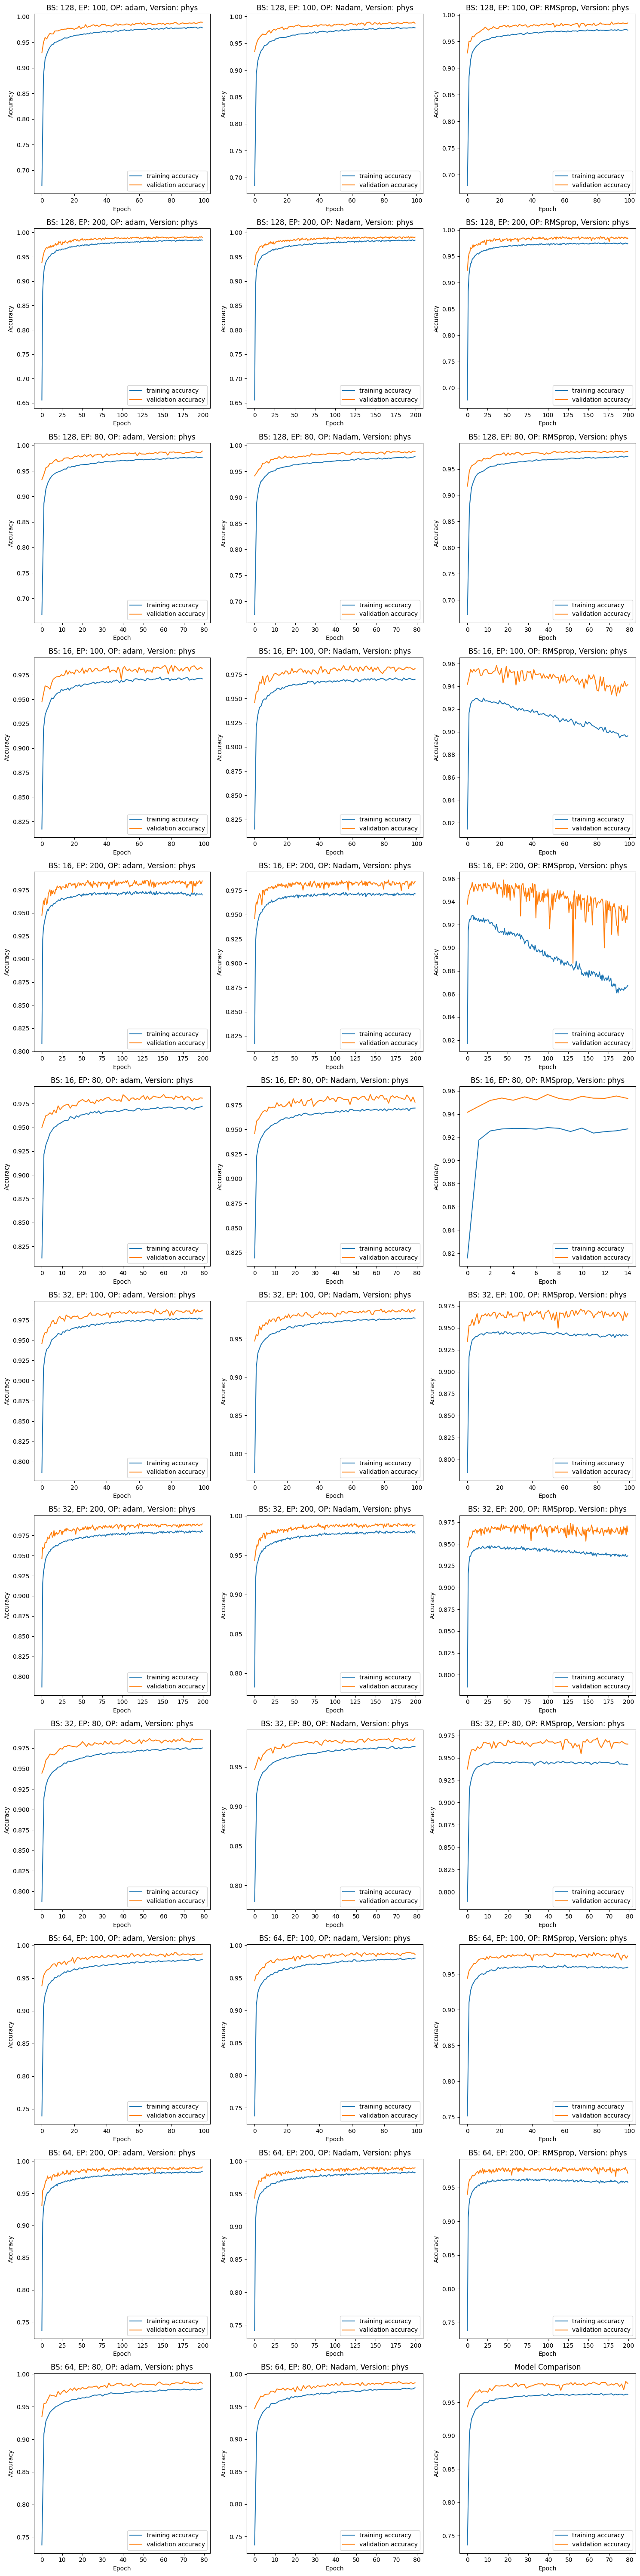

In [32]:
# function to plot the accuracy
n = len(params)  # Number of plots
cols = 3  # number of columns for the plots
rows = n // cols + (n % cols > 0)  # number of rows necvessary to plot every combination

fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))  

if n == 1:
    axs = np.array([[axs]])
elif rows == 1:
    axs = np.array([axs])
    
for i, (bs, ep, op, version) in enumerate(params):
    ax = axs[i//cols, i%cols]
    df = load_log_data(log_dir, bs, ep, op, version)
    plot_accuracy2(ax, df, bs, ep, op, version)

# Hiding empty subplots if necessary
if n % cols != 0:
    for j in range(n, rows*cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
ax.set_title('Model Comparison')
plt.show()

## Plotting the loss

In [33]:
plots_dir = os.path.join(log_dir, 'loss_plots')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

In [35]:
plot_loss_and_save(params, plots_dir = plots_dir)

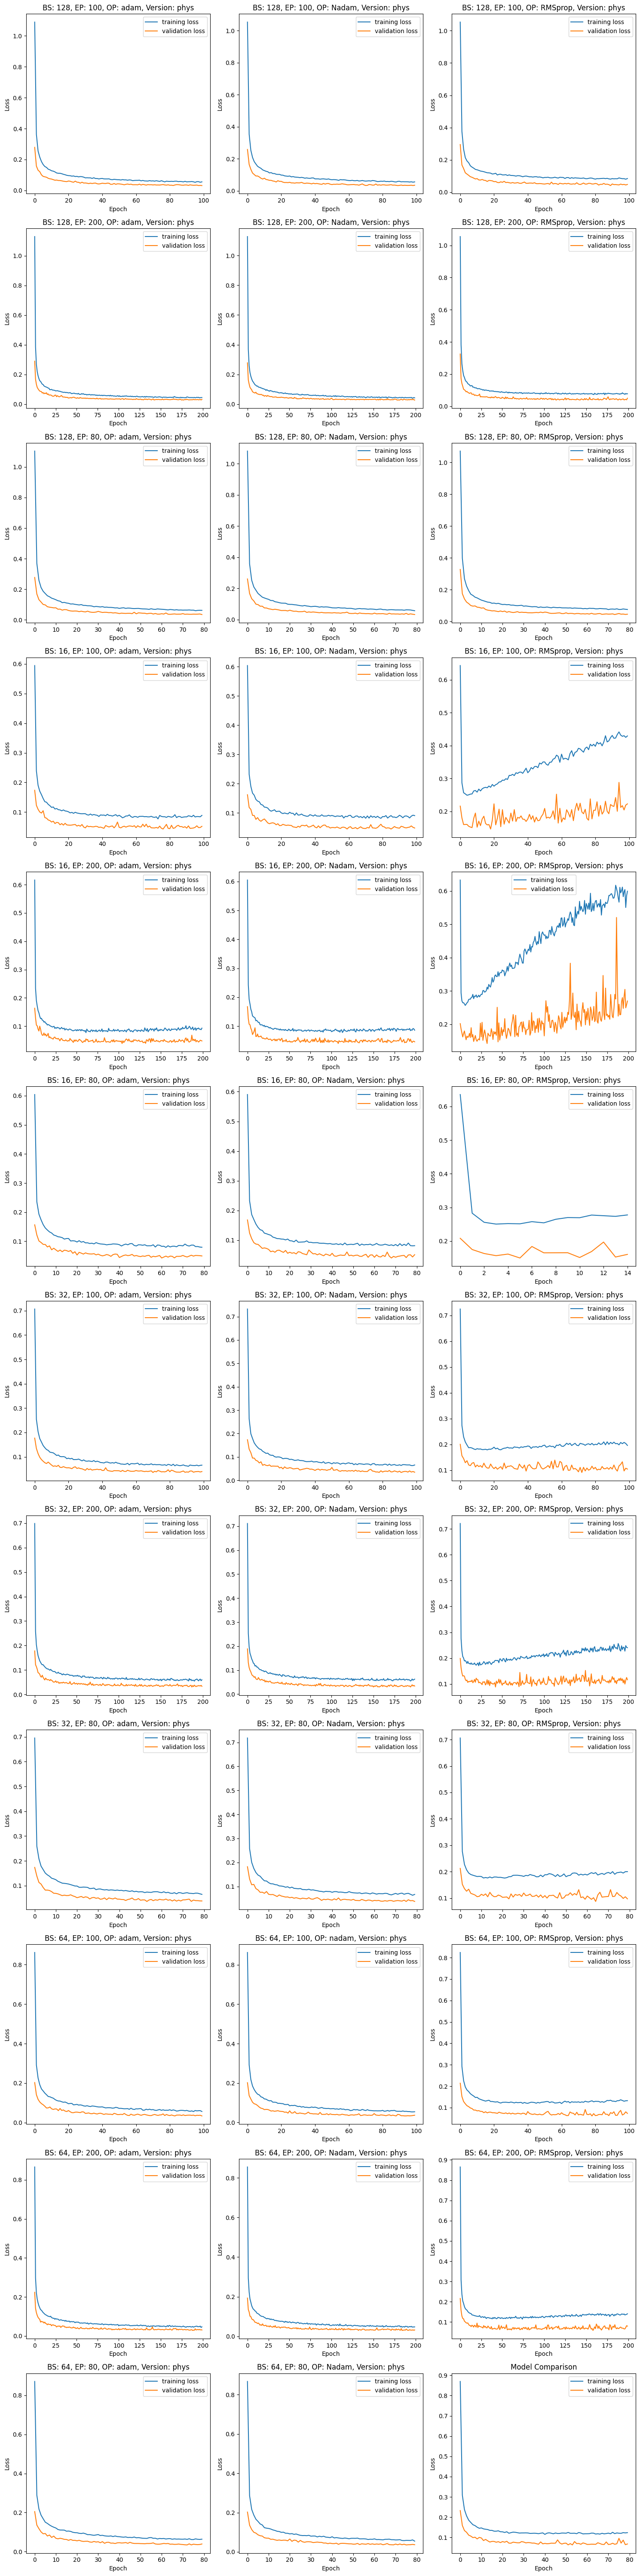

In [45]:
n = len(params)  # number of plots
cols = 3  # Number of columns
rows = n // cols + (n % cols > 0)  # Claculating the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))  # Has to be defined

if n == 1:
    axs = np.array([[axs]])
elif rows == 1:
    axs = np.array([axs])
    
for i, (bs, ep, op, version) in enumerate(params):
    ax = axs[i//cols, i%cols]
    df = load_log_data(log_dir, bs, ep, op, version)
    plot_loss(ax, df, bs, ep, op, version)
    #ax.set_yscale('log')  # Y-axis logarithmic

# Hiding empty subplots if necessary
if n % cols != 0:
    for j in range(n, rows*cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
ax.set_title('Model Comparison')
plt.show()

## Comparing model training curves in the same plot

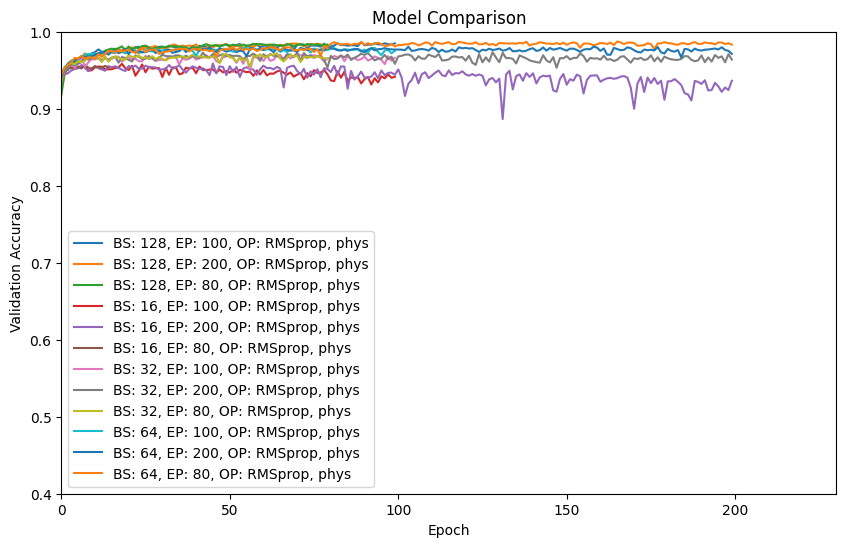

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

for bs, ep, op, version in params:
    if op == 'RMSprop':
        df = load_log_data(log_dir, bs, ep, op, version)
        if df is not None:
            ax.plot(df['epoch'], df['val_accuracy'], label=f'BS: {bs}, EP: {ep}, OP: {op}, {version}')

ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Model Comparison')
ax.legend()

ax.set_ylim([0.4, 1.0])
ax.set_xlim([0, 230])

plt.show()

## Directly compare the accuracies of the models with different hyperparameters

In [38]:
filename = os.path.join(folder_reports, date + '_' +version + '_model_performance_summary.csv')

# read csv-files
df_results = pd.read_csv(filename)

In [39]:
df_results.loc[df_results['test_accuracy'].idxmax()]

optimizer                                                     adam
batch_size                                                     128
epochs                                                         200
train_loss       [1.107407569885254, 0.36131078004837036, 0.253...
val_loss         [0.28900715708732605, 0.16278444230556488, 0.1...
test_loss                                                  0.02757
test_accuracy                                             0.990741
Name: 11, dtype: object

In [40]:
df_results.loc[df_results['test_loss'].idxmin()]

optimizer                                                    Nadam
batch_size                                                     128
epochs                                                         200
train_loss       [1.109847903251648, 0.3581724464893341, 0.2536...
val_loss         [0.2867046892642975, 0.1705954223871231, 0.126...
test_loss                                                 0.027006
test_accuracy                                             0.990487
Name: 23, dtype: object

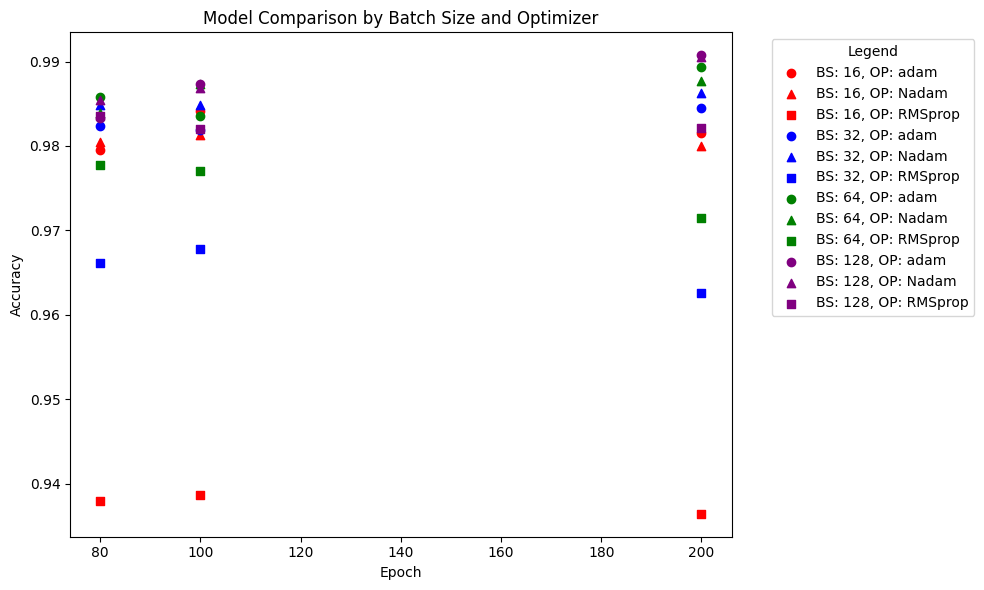

In [41]:
batch_sizes = df_results['batch_size'].unique()
optimizers = df_results['optimizer'].unique()

# Defining markers and colours
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
markers = ['o', '^', 's', 'p', '*', '+']
color_dict = dict(zip(batch_sizes, colors))
marker_dict = dict(zip(optimizers, markers))

plt.figure(figsize=(10, 6))

# Interating over 'bs' and 'op' 
for bs in batch_sizes:
    for op in optimizers:
        subset = df_results[(df_results['batch_size'] == bs) & (df_results['optimizer'] == op)]
        
        if not subset.empty:
            plt.scatter(subset['epochs'], subset['test_accuracy'], color=color_dict[bs], marker=marker_dict[op], label=f'BS: {bs}, OP: {op}')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Comparison by Batch Size and Optimizer')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = os.path.join(plots_dir, f'accuracy_comparison_{version}.png')
plt.savefig(plot_path)
plt.show()

C:\Users\mlinke\AppData\Local\Temp\ipykernel_15584\3188080811.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


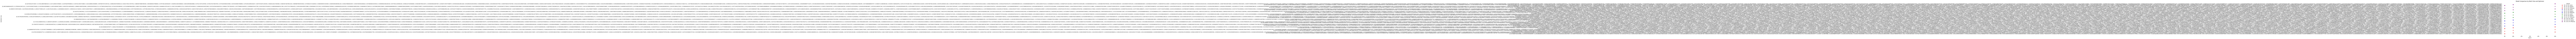

In [42]:
batch_sizes = df_results['batch_size'].unique()
optimizers = df_results['optimizer'].unique()

# Defining colours and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
markers = ['o', '^', 's', 'p', '*', '+']
color_dict = dict(zip(batch_sizes, colors))
marker_dict = dict(zip(optimizers, markers))

plt.figure(figsize=(10, 6))

# Iterating over 'bs' and 'op' 
for bs in batch_sizes:
    for op in optimizers:
        subset = df_results[(df_results['batch_size'] == bs) & (df_results['optimizer'] == op)]
        
        if not subset.empty:
            plt.scatter(subset['epochs'], subset['val_loss'], color=color_dict[bs], marker=marker_dict[op], label=f'BS: {bs}, OP: {op}')

plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.title('Model Comparison by Batch Size and Optimizer')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Generate table of best models for each values 
Best model according to loss and accuracy

In [36]:
#df_comparison_results_max_acc['geom_V1']

In [48]:
date = '2024-03-22_13-06-27'
versions = ['geom_V1', 'geom_V2', 'geom_V3', 'geom_V4', 'geom_V5', 'phys']
#metrics = ["optimizer", "batch_size", "epochs", "test_loss", "test_accuracy"]

# initialize data frame
comparison_results_max_acc = []
comparison_results_min_loss = []

for version in versions:
    # set dirs
    log_dir = os.path.join('logs', 'fit', date, version)
    folder_models = os.path.join('CNN_models', date, version)
    folder_reports = os.path.join('Reports', date, version)

    # load file
    filename = os.path.join(folder_reports, date + '_' +version + '_model_performance_summary.csv')
    df_results = pd.read_csv(filename)
    
    op = df_results.loc[df_results['test_accuracy'].idxmax()].optimizer
    bs = df_results.loc[df_results['test_accuracy'].idxmax()].batch_size
    ep = df_results.loc[df_results['test_accuracy'].idxmax()].epochs
    loss = df_results.loc[df_results['test_accuracy'].idxmax()].test_loss
    acc = df_results.loc[df_results['test_accuracy'].idxmax()].test_accuracy

    comparison_results_max_acc.append({
        'version': version,
        'optimizer': op,
        'batch_size': bs,
        'epochs': ep,
        'test_loss': loss,
        'test_accuracy': acc
    })
   
    op2 = df_results.loc[df_results['test_loss'].idxmin()].optimizer
    bs2 = df_results.loc[df_results['test_loss'].idxmin()].batch_size
    ep2 = df_results.loc[df_results['test_loss'].idxmin()].epochs
    loss2 = df_results.loc[df_results['test_loss'].idxmin()].test_loss
    acc2 = df_results.loc[df_results['test_loss'].idxmin()].test_accuracy

    comparison_results_min_loss.append({
        'version': version,
        'optimizer': op2,
        'batch_size': bs2,
        'epochs': ep2,
        'test_loss': loss2,
        'test_accuracy': acc2
    })

df_comparison_results_max_acc = pd.DataFrame(comparison_results_max_acc)
df_comparison_results_min_loss = pd.DataFrame(comparison_results_min_loss)
df_comparison_results_max_acc.to_csv(os.path.join('Reports', date, date + '_model_performance_comparison_max_acc.csv'), index=False)
df_comparison_results_min_loss.to_csv(os.path.join('Reports', date, date + '_model_performance_comparison_min_loss.csv'), index=False)
    

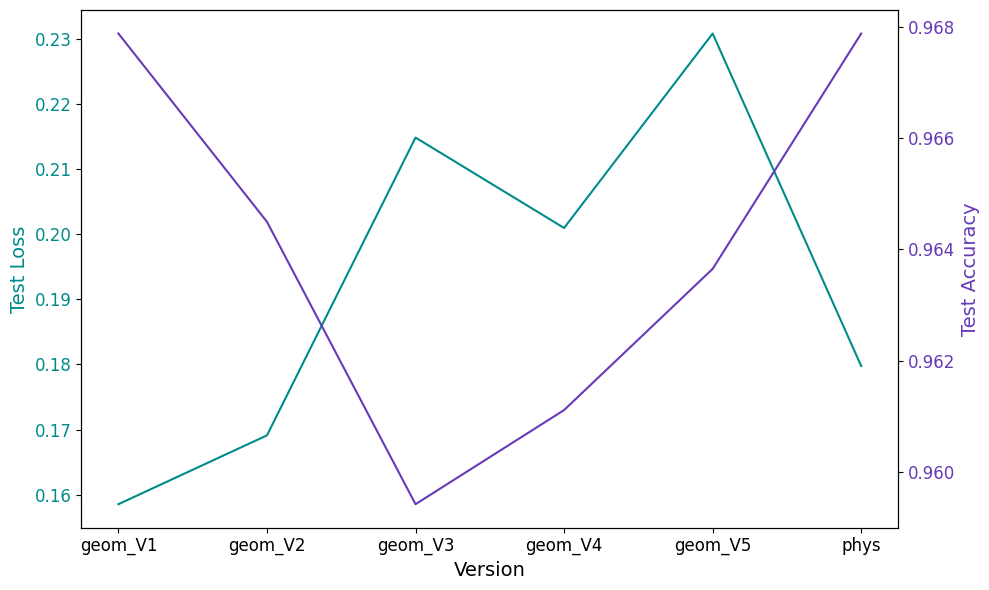

In [49]:
import matplotlib.pyplot as plt

versions = df_comparison_results_max_acc['version']
test_loss = df_comparison_results_max_acc['test_loss']
test_accuracy = df_comparison_results_max_acc['test_accuracy']

fig, ax1 = plt.subplots(figsize=(10, 6))

color='#008B8B'

ax1.set_xlabel('Version', fontsize=14)
ax1.set_ylabel('Test Loss', color=color, fontsize=14)
ax1.plot(versions, test_loss, color=color, label='Test Loss')
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
# Defining second axis
ax2 = ax1.twinx()  
ax1.tick_params(axis='x', labelsize=12)

color='#673AB7'
ax2.set_ylabel('Test Accuracy', color=color, fontsize=14)  
ax2.plot(versions, test_accuracy, color=color, label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

# title and legend
#plt.title('Comparison of Versions by Loss and Accuracy')
fig.tight_layout()  

plot_path = os.path.join('Reports', date, date + f'_model_comparison_max_acc_lines.png')
plt.savefig(plot_path)

plt.show()

## Plotting as barplot

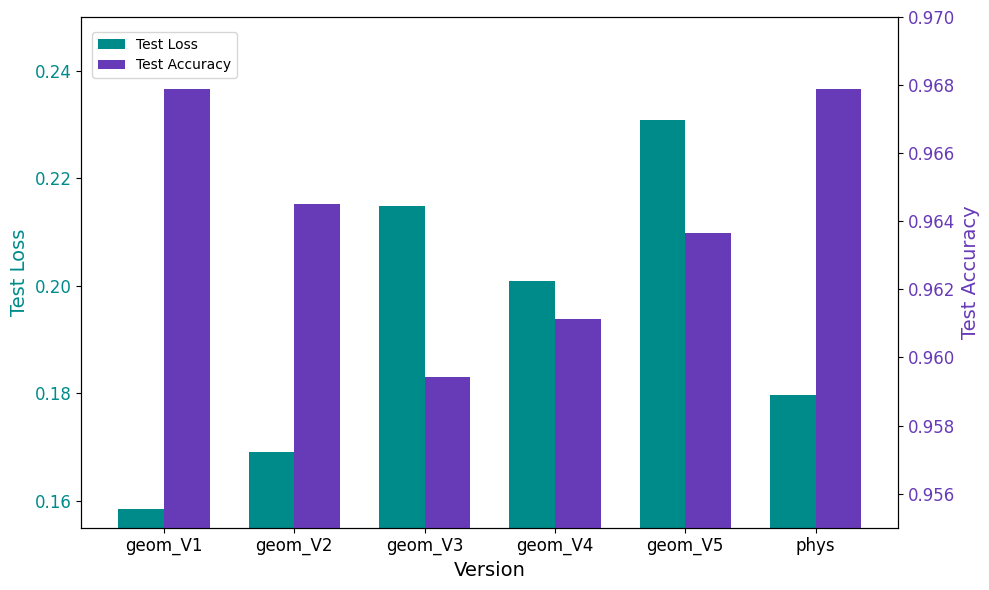

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os

versions = df_comparison_results_max_acc['version']
test_loss = df_comparison_results_max_acc['test_loss']
test_accuracy = df_comparison_results_max_acc['test_accuracy']

# Defining bars
bar_width = 0.35
index = np.arange(len(versions))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(index - bar_width/2, test_loss, bar_width, color='#008B8B', label='Test Loss')

# Defining second axis for accuracy
ax2 = ax1.twinx() 

# Test Accuracy bars
ax2.bar(index + bar_width/2, test_accuracy, bar_width, color='#673AB7', label='Test Accuracy')

# axis and ticks
ax1.set_xlabel('Version', fontsize=14)
ax1.set_ylabel('Test Loss', color='#008B8B', fontsize=14)
ax2.set_ylabel('Test Accuracy', color='#673AB7', fontsize=14)
ax1.set_xticks(index)
ax1.set_xticklabels(versions, fontsize=12)
ax1.tick_params(axis='y', labelcolor='#008B8B', labelsize=12)
ax2.tick_params(axis='y', labelcolor='#673AB7', labelsize=12)

ax1.set_ylim([0.155, 0.25])  
ax2.set_ylim([0.955, 0.97])  

# title and legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.09,0.95))

# savind the plots
plot_path = os.path.join('Reports', date, date + f'_model_comparison_max_acc_barplot.png')
plt.savefig(plot_path)

plt.show()

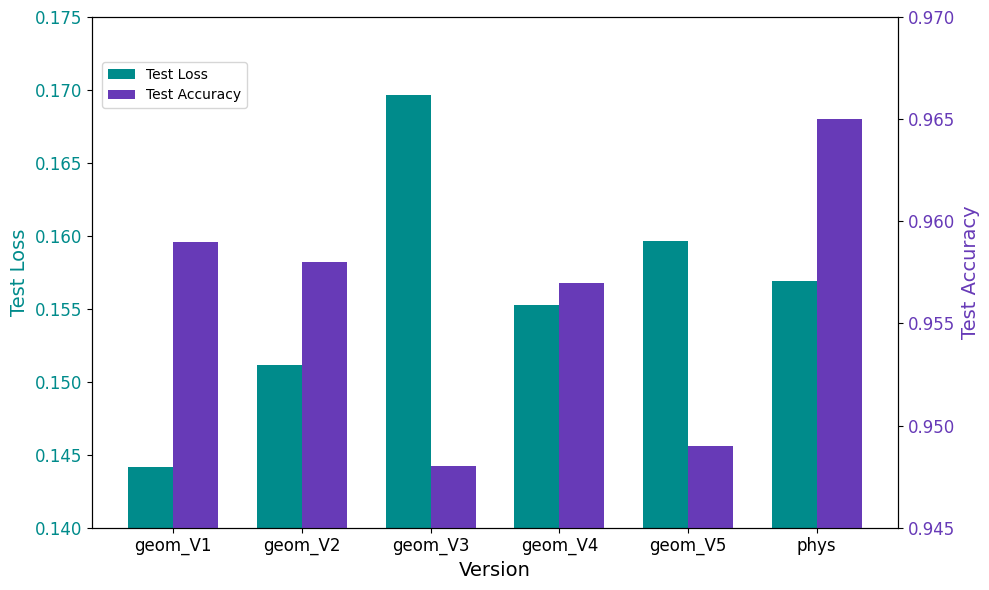

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os

versions = df_comparison_results_min_loss['version']
test_loss = df_comparison_results_min_loss['test_loss']
test_accuracy = df_comparison_results_min_loss['test_accuracy'].round(3)

# defining the bars
bar_width = 0.35
index = np.arange(len(versions))


fig, ax1 = plt.subplots(figsize=(10, 6))

# loss axis
ax1.bar(index - bar_width/2, test_loss, bar_width, color='#008B8B', label='Test Loss')

# accuracy axis
ax2 = ax1.twinx() 

# bar
ax2.bar(index + bar_width/2, test_accuracy, bar_width, color='#673AB7', label='Test Accuracy')

# axis and ticks
ax1.set_xlabel('Version', fontsize=14)
ax1.set_ylabel('Test Loss', color='#008B8B', fontsize=14)
ax2.set_ylabel('Test Accuracy', color='#673AB7', fontsize=14)
ax1.set_xticks(index)
ax1.set_xticklabels(versions, fontsize=12)
ax1.tick_params(axis='y', labelcolor='#008B8B', labelsize=12)
ax2.tick_params(axis='y', labelcolor='#673AB7', labelsize=12)

ax1.set_ylim([0.14, 0.175])  
ax2.set_ylim([0.945, 0.97])  

# title and legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# saving
plot_path = os.path.join('Reports', date, date + f'_model_comparison_min_loss_barplot.png')
plt.savefig(plot_path)

plt.show()

## Comparing the macro average of the accuracy values to evaluate the model performance 

In [15]:
params = extract_params_from_classification_filenames(directory = folder_reports, date = date)

[(128, 100, 'adam', 'phys'),
 (128, 100, 'Nadam', 'phys'),
 (128, 200, 'adam', 'phys'),
 (128, 200, 'Nadam', 'phys'),
 (128, 80, 'adam', 'phys'),
 (128, 80, 'Nadam', 'phys'),
 (16, 100, 'adam', 'phys'),
 (16, 100, 'Nadam', 'phys'),
 (16, 200, 'adam', 'phys'),
 (16, 200, 'Nadam', 'phys'),
 (16, 80, 'adam', 'phys'),
 (16, 80, 'Nadam', 'phys'),
 (32, 100, 'adam', 'phys'),
 (32, 100, 'Nadam', 'phys'),
 (32, 200, 'adam', 'phys'),
 (32, 200, 'Nadam', 'phys'),
 (32, 80, 'adam', 'phys'),
 (32, 80, 'Nadam', 'phys'),
 (64, 100, 'adam', 'phys'),
 (64, 100, 'Nadam', 'phys'),
 (64, 200, 'adam', 'phys'),
 (64, 200, 'Nadam', 'phys'),
 (64, 80, 'adam', 'phys'),
 (64, 80, 'Nadam', 'phys')]

In [20]:
# loading the classification report
output_file_path = os.path.join(folder_reports, date + '_' + version + '_classification_reports_summary.csv')

# function to extract metrics
def extract_metrics(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if 'macro avg' in line:
                macro_avg = line.split()
            elif 'accuracy' in line:
                accuracy = line.split()
    return macro_avg, accuracy


extracted_data = []

for bs, ep, op, version in params:
    filename = rf'{date}-bs_{bs}-ep_{ep}-op_{op}_{version}_classification_report.txt'
    filepath = os.path.join(folder_reports, filename)
    if os.path.exists(filepath):
        macro_avg, accuracy = extract_metrics(filepath)
        extracted_data.append({
        'version': version,
        'optimizer': op,
        'batch_size': bs,
        'epochs': ep,
        'macro_avg': macro_avg,
        'accuracy': accuracy
    })
    else:
        print(f'Datei {filepath} nicht gefunden.')

# converting the extracted data into data frame and saving as csv
df_extracted_data = pd.DataFrame(extracted_data)
print(df_extracted_data)
df_extracted_data.to_csv(output_file_path, index=False)

print(f"The macro average was wirtten into {output_file_path} .")

   version optimizer  batch_size  epochs  \
0     phys      adam         128     100   
1     phys     Nadam         128     100   
2     phys      adam         128     200   
3     phys     Nadam         128     200   
4     phys      adam         128      80   
5     phys     Nadam         128      80   
6     phys      adam          16     100   
7     phys     Nadam          16     100   
8     phys      adam          16     200   
9     phys     Nadam          16     200   
10    phys      adam          16      80   
11    phys     Nadam          16      80   
12    phys      adam          32     100   
13    phys     Nadam          32     100   
14    phys      adam          32     200   
15    phys     Nadam          32     200   
16    phys      adam          32      80   
17    phys     Nadam          32      80   
18    phys      adam          64     100   
19    phys     Nadam          64     100   
20    phys      adam          64     200   
21    phys     Nadam          64